# **Advanced Algorithm HW 4 2-(a)**


In Python, implement (a) a recursive solution, (b) a dynamic programming solution, (c) a recursive greedy solution, and (d) an iterative greedy solution to the following activity selection problem.

i  |  1 |  2 |  3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11
-- | -- | -- | -- | -- | -- | -- | -- | -- | -- | --  | --
s<sub>i</sub> |  1 |  3 |  0 | 5 | 3 | 5 | 6 | 8 | 8 | 2 | 12 
f<sub>i</sub> |  4 |  5 |  6 | 7 | 9 | 9 | 10 | 11 | 12 | 14 | 16

## **Recursive Solution on Activity Selection Problem**

In [1]:
def recursive_activity_selector(activities):
    if len(activities) < 1:
        return (0, [])
    c = -10000 # length of the optimal solution
    solution = []
    for activity in activities:
      # print(activity)
      i_start  = activity[0]
      #print(i_start)
      i_finish = activity[1]
      
      #print(i_start, i_finish)
      # Step1: Obtain activities that finish before i starts
      left = []
      
      # ToDo:
      # loop through activities to extract the next start and finish time
      # current start time is bigger than next finish time, then 
      # add it to the left.
      for i in activities:
        next_start = i[0]
        next_finish = i[1]
        if i_start >= next_finish: 
          left.append(i)
      #print(left)
      
      # Step2: Obtain activities that start after i finishes
      right = []
      
      # To-Do:
      # loop through activities to extract the next start and finish time.
      # if next start time is bigger or equal to current finish time
      # append it to right
      for i in activities:
        next_start = i[0]
        next_finish = i[1]
        if next_start >= i_finish:
          right.append(i)
      #print(right)
      
      # Step3: Check if selecting this activity increases the count
      c_left = recursive_activity_selector(left)
      c_right = recursive_activity_selector(right)

      c_better = c_left[0] + c_right[0] + 1 # 1 represents this 'activity'
      if c_better > c:
        c = c_better
        solution.append(activity)
        if len(c_left[1]) > 0: solution.extend(c_left[1])
        if len(c_right[1]) > 0: solution.extend(c_right[1])
    return c, solution

start  = [ 1, 3, 0, 5, 3, 5, 6, 8, 8,  2,  12 ]
finish = [ 4, 5, 6, 7, 9, 9, 10, 11, 12, 14, 16 ]
activities = []
for i in range(len(start)):
    activities.append((start[i], finish[i]))

print('')
print('All activities')
print(activities)

print('')
num_optimal_activities, solution = recursive_activity_selector(activities)
print(num_optimal_activities)
print(solution)


All activities
[(1, 4), (3, 5), (0, 6), (5, 7), (3, 9), (5, 9), (6, 10), (8, 11), (8, 12), (2, 14), (12, 16)]

4
[(1, 4), (5, 7), (8, 11), (12, 16)]


## **Dynamic Programming Solution on Activity Selection Problem**

In [11]:
def dp_activity_selector(activities):
  # s represents(stores) the activities that are mutually compatible.
  s = [[] for i in range(len(activities))]

  # Loop through all activities
  for i in range(len(activities)):
    
    # if there are activities that start
    for j in range(i):
      #compare the current activities's start time and the next activities fini
      #-sh time. Skip if the next start time is less than current finish time.
      start = activities[i][0] # next start time.
      finish = activities[j][1] # current finish time

      # s[i] will store the activity that's not overlapping, s[j] will track,
      # next activity

      # If next start time is similar or greater than current finish time, and 
      # compare the length of non-overlapping and length of next activity length.
      # basically storing activity that starts before i starts.
      # also this is where the increment starts.
      # c[i,j] = c[i, k] + c[k, j] + 1
      if finish <= start and len(s[i]) < len(s[j]):
        s[i] = s[j].copy()

    # activity that finishes i.
    s[i].append(activities[i])

  optimal_soln = []
  for l in s:
    #find the maximum solution in that s, which it stores all the possiblities 
    #of scheduling that doesn't overlap in activities.
    if len(optimal_soln) < len(l):
      optimal_soln = l
  # return the non-overlapping activities
  return len(optimal_soln), optimal_soln

start  = [ 1, 3, 0, 5, 3, 5, 6, 8, 8,  2,  12 ]
finish = [ 4, 5, 6, 7, 9, 9, 10, 11, 12, 14, 16 ]
activities = []
for i in range(len(start)):
    activities.append((start[i], finish[i]))

print('')
print('All activities')
print(activities)

print('')
num_optimal_activities, solution = dp_activity_selector(activities)
print("Num of optimal solution : {}, solution : {}".format(num_optimal_solution, solution))


All activities
[(1, 4), (3, 5), (0, 6), (5, 7), (3, 9), (5, 9), (6, 10), (8, 11), (8, 12), (2, 14), (12, 16)]

Num of optimal solution : 4, solution : [(1, 4), (5, 7), (8, 11), (12, 16)]


## **Recursive Greedy Approach on Activity Selection Problem**

In [3]:
def recursive_greedy_approach(s, f, k, n):
  # this is sort of counter to see the next element.
  m = k + 1
  solution = []
  
  # this will be the counter where m gets index out of range
  if m > n:
    return solution
  
  # Skipping the element which is overlapping
  while m <= n and s[m] < f[k]:
    m += 1
    
  solution.append(m)
  x = recursive_greedy_approach(s, f, m, n)
  solution.extend(x)

  return solution

In [4]:
start  = [0, 1, 3, 0, 5, 3, 5, 6, 8, 8,  2,  12 ]
finish = [0, 4, 5, 6, 7, 9, 9, 10, 11, 12, 14, 16 ]
n = len(start)

recursive_greedy_approach(start, finish, 0, n-1)

[1, 4, 8, 11]

## **Iterative Greedy Approach on Activity Selection Problem**

Used the algorithm(pseudo code from [Actvitiy-greedy algorithm](https://en.wikipedia.org/wiki/Activity_selection_problem) and [Iterative greedy approach to solve the activity selection problem](https://www.youtube.com/watch?v=VPkTE5XoYQ0&feature=youtu.be&ab_channel=BadriAdhikari)


In [93]:
def iterative_greedy_approach(activities, s, f):
  #Sort A by finish time
  activities.sort(key=lambda x:x[1])

  n = len(activities)
  A = []*n
  # Set a1 to A1.
  A.append(activities[0])
  # Set index for most recent added activity
  k = 1

  for i in range(1, n):
    # If the next start time is bigger than the current finish time, then add
    # to the list 
    if s[i] >= f[k]:
      x = activities[i]
      # A = A U {ai}
      A.append(x)
      # current solution i will be the previous solution.
      k = i
  return len(A), A

start  = [ 1, 3, 0, 5, 3, 5, 6, 8, 8,  2,  12 ]
finish = [ 4, 5, 6, 7, 9, 9, 10, 11, 12, 14, 16 ]
activities = []
for i in range(len(start)):
    activities.append((start[i], finish[i]))

num_optimal_solution, solution = iterative_greedy_approach(activities, start, finish)
print("Num of optimal solution : {}, solution : {}".format(num_optimal_solution, solution))

Num of optimal solution : 4, solution : [(1, 4), (5, 7), (8, 11), (12, 16)]


# **Question 3**


## **First step is to shuffle the activity list with help of random library**

### **Check Running time for both iterative-greedy approach without sorting & iterative-greedy approach with sorted input.**

There is assumption in this program, since the program did not work with activities[0:i] because index gets out of range, Simply, I am pushing each element getting rid of first element of array. Then get the each time, then reverse that time.

### **This is how I can verify that iterative greedy algorithm with unsorted input is equal to iterative greedy algorithm + sorting time**

* Get the time for sorting
* add time_sorted(iterative algorithm) to sorting time
* compare the graph with unsorted time and sorting + time_sorted 

### **-- This code mainly use time and timeit function, numpy, and matplotlib for graphics --**


In [107]:
import random

def sorted_iterative_greedy_approach(activities, s, f):
  activities.sort(key=lambda x:x[1])
  n = len(activities)
  A = []*n
  # Set a1 to A1.

  A.append(activities[0])
  # Set index for most recent added activity
  k = 1
  
  for i in range(1, n):
    # If the next start time is bigger than the current finish time, then add
    # to the list 
    if s[i] >= f[k]:
      x = activities[i]
      # A = A U {ai}
      A.append(x)
      # current solution i will be the previous solution.
      k = i
  return len(A), A

start  = [ 1, 3, 0, 3 , 3, 5, 6, 8, 8,  2,  12 ]
finish = [ 4, 5, 6, 7,  9, 9, 10, 11, 12, 14, 16 ]
sorted_activities = []
for i in range(len(start)):
    sorted_activities.append((start[i], finish[i]))

unsorted_activities = list(sorted_activities)
random.shuffle(unsorted_activities)
print("Unsorted Activity")
print(unsorted_activities)
print("")

print("Sorted Activitiy by finish time")
print(sorted_activities)
num_optimal_solution, solution = sorted_iterative_greedy_approach(sorted_activities, start, finish)
print("Num of optimal solution : {}, solution : {}".format(num_optimal_solution, solution))

Unsorted Activity
[(6, 10), (8, 12), (0, 6), (1, 4), (3, 5), (3, 9), (5, 9), (8, 11), (3, 7), (2, 14), (12, 16)]

Sorted Activitiy by finish time
[(1, 4), (3, 5), (0, 6), (3, 7), (3, 9), (5, 9), (6, 10), (8, 11), (8, 12), (2, 14), (12, 16)]
Num of optimal solution : 3, solution : [(1, 4), (5, 9), (12, 16)]


[(1, 4), (3, 5), (0, 6), (3, 7), (3, 9), (5, 9), (6, 10), (8, 11), (8, 12), (2, 14), (12, 16)]
[(1, 4), (3, 5), (0, 6), (3, 7), (3, 9), (5, 9), (6, 10), (8, 11), (8, 12), (2, 14), (12, 16)]
[1.076164501000676, 1.2720508130005328, 1.4339708570005314, 1.5748636090011132, 1.7577950060003786, 1.9672536180005409, 2.100284729998748, 2.3764580299994122, 2.432525801999873, 2.6995399040006305, 2.979036795999491]
[1.0694979529998818, 1.3100097860005917, 1.488687746999858, 1.585425989000214, 1.719117370999811, 1.968630897001276, 2.1007108060002793, 2.3159313460000703, 2.4978940700002568, 2.6063393739987077, 2.859160054000313]
7.605552673339844e-05
11
[1.0695740085266152, 1.310085841527325, 1.4887638025265915, 1.5855020445269474, 1.7191934265265445, 1.9687069525280094, 2.1007868615270127, 2.3160074015268037, 2.49797012552699, 2.606415429525441, 2.859236109527046]


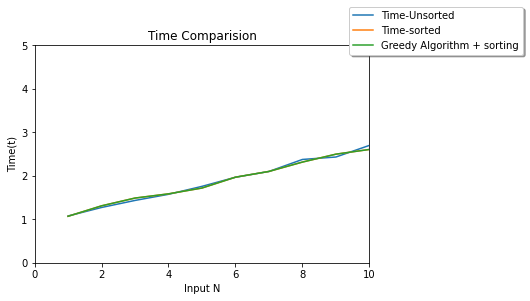

In [135]:
import matplotlib.pyplot as plt
import numpy as np

import time

def time_execution(func, **kwargs):
  import timeit
  return timeit.timeit('func(**kwargs)', globals=locals())

def run_unsorted():
  time_exe1 = [] 
  for i in range(len(activities)):
    a = unsorted_activities[i:]
    time = time_execution(sorted_iterative_greedy_approach, **{'activities':a, 's' : start, 'f': finish})
    time_exe1.append(time)
  
  print(unsorted_activities)
  return time_exe1

def run_sorted():
  time_exe2 = []
  for i in range(len(activities)):
    a = sorted_activities[i:]
    time = time_execution(sorted_iterative_greedy_approach, **{'activities':a, 's' : start, 'f': finish})
    time_exe2.append(time)
  print(sorted_activities)
  return time_exe2

# Time_sorted repre
time_unsorted = run_unsorted()
time_sorted = run_sorted()

#print(time_unsorted)
#print(time_sorted)

time_unsorted.reverse()
time_sorted.reverse()
print(time_unsorted)
print(time_sorted)

#calculating sorting time
start_time = time.time()
unsorted_activities.sort(key=lambda x:x[1])
z = time.time()-start_time
#Look at the time that it tooks for sorting.
print(z)

#print the length time_sorted
print(len(time_sorted))

# add the sorting + iterative greedy algorithm
time_compare = []
for i in range(0, (len(time_sorted))):
  time_compare.append(z + time_sorted[i])

print(time_compare)

#Create range from 1 to 11
x = np.arange(1, 12)
plt.plot(x, time_unsorted, label="Time-Unsorted")
plt.plot(x, time_sorted, label="Time-sorted")
plt.plot(x, time_compare, label="Greedy Algorithm + sorting")
plt.title("Time Comparision")
plt.xlabel("Input N")
plt.ylabel("Time(t)")
plt.axis([0, 10, 0, 5])
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1.2), shadow=True, ncol=1)
plt.show()